<a href="https://colab.research.google.com/github/ivan1003hsu/python_work/blob/master/for_CP/HW_transer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, ReLU, Dense, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [0]:
from tensorflow.keras import datasets

# Load CIFAR 100
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# Normalize the range of featurs
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

91


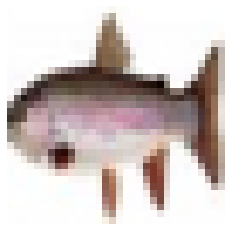

In [11]:
import matplotlib.pyplot as plt
idx = np.random.randint(U_train.shape[0])
U_sample = U_train[idx]
v_sample = v_train0[idx].squeeze()
print(v_sample)
plt.imshow(U_sample)
plt.axis('off');

## ----------------先訓練一個100分類的model-------------------


In [0]:
def resnet_CNN2(a,f_n=16,f_size=(3,3),activation='relu'):
    #a1 = Conv2D(int(f_n/2) ,(1,1), activation=activation, padding='same')(a) ##減小參數數，參考inception v2
    a1 = Conv2D(f_n ,f_size, activation=activation, padding='same')(a)
    a1 = BatchNormalization()(a1)
    a = Add()([a,a1])
    a = ReLU()(a)
    return a

In [0]:
inputx = Input(shape=(32,32,3,))
x = Conv2D(16,(2,2), padding='same',activation='relu')(inputx)
x = resnet_CNN2(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(32,(2,2), padding='same',activation='relu')(x)
x = resnet_CNN2(x, f_n=32)
x = MaxPooling2D(2,2)(x)

x = Conv2D(64,(2,2), padding='same',activation='relu')(x)
x = resnet_CNN2(x, f_n=64)
x = MaxPooling2D(2,2)(x)

x = Conv2D(128,(2,2), padding='same',activation='relu')(x)
x = resnet_CNN2(x, f_n=128)
x = MaxPooling2D(2,2)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x）
x = Dense(128, activation='relu')(x)
x = Dense(100, activation='softmax')(x)
Hundred_class_M = Model(inputs=inputx, outputs=x)

In [39]:
Hundred_class_M.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
Hundred_class_M.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_110 (Conv2D)             (None, 32, 32, 16)   208         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_111 (Conv2D)             (None, 32, 32, 16)   2320        conv2d_110[0][0]                 
__________________________________________________________________________________________________
batch_normalization_127 (BatchN (None, 32, 32, 16)   64          conv2d_111[0][0]                 
____________________________________________________________________________________________

In [42]:
mycallback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]

history = Hundred_class_M.fit(U_train,v_train, batch_size=2048, epochs=100,validation_data=(U_test, v_test), callbacks=mycallback)

Epoch 1/100
25/25 [==============================] - 165s 7s/step - loss: 2.8362 - accuracy: 0.2899 - val_loss: 4.6026 - val_accuracy: 0.0140
Epoch 2/100
25/25 [==============================] - 165s 7s/step - loss: 2.6914 - accuracy: 0.3192 - val_loss: 4.5982 - val_accuracy: 0.0131
Epoch 3/100
25/25 [==============================] - 167s 7s/step - loss: 2.5448 - accuracy: 0.3500 - val_loss: 4.5917 - val_accuracy: 0.0148
Epoch 4/100
25/25 [==============================] - 168s 7s/step - loss: 2.4025 - accuracy: 0.3814 - val_loss: 4.5753 - val_accuracy: 0.0194
Epoch 5/100
25/25 [==============================] - 168s 7s/step - loss: 2.2750 - accuracy: 0.4057 - val_loss: 4.5567 - val_accuracy: 0.0208
Epoch 6/100
25/25 [==============================] - 168s 7s/step - loss: 2.1499 - accuracy: 0.4325 - val_loss: 4.5269 - val_accuracy: 0.0312
Epoch 7/100
25/25 [==============================] - 168s 7s/step - loss: 2.0333 - accuracy: 0.4614 - val_loss: 4.4987 - val_accuracy: 0.0379
Epoch 

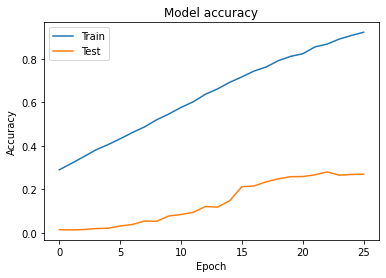

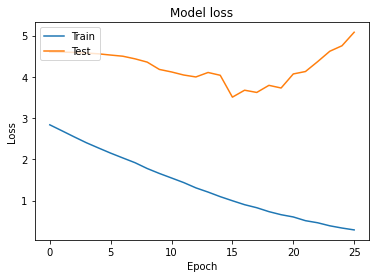

In [43]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
import os
from google.colab import drive
drive.mount('/content/drive/')

path = "/content/drive/My Drive/Colab Notebooks/"

os.chdir(path)
os.listdir(path)
Hundred_class_M.save('Hundred_class_M.h5')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## =============================100分類訓練完畢=================================

下面製作凍結的model

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, ReLU, Dense, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


In [48]:
import os
from google.colab import drive
drive.mount('/content/drive/')

path = "/content/drive/My Drive/Colab Notebooks/"

os.chdir(path)
os.listdir(path)
Hundred_class_M = tf.keras.models.load_model('Hundred_class_M.h5')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [50]:
outputx = Hundred_class_M.layers[-4].output
hundred_class_M = Model(inputs=Hundred_class_M.input, outputs=outputx)
for layer in hundred_class_M.layers:
  layer.trainable = False
hundred_class_M.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_110 (Conv2D)             (None, 32, 32, 16)   208         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_111 (Conv2D)             (None, 32, 32, 16)   2320        conv2d_110[0][0]                 
__________________________________________________________________________________________________
batch_normalization_127 (BatchN (None, 32, 32, 16)   64          conv2d_111[0][0]                 
____________________________________________________________________________________________

載入10分類的資料

In [51]:
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
inputy = hundred_class_M.output
y = Dense(64, activation='relu')(inputy)
#y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
Ten_class_M = Model(inputs=hundred_class_M.input, outputs=y)

In [56]:
Ten_class_M.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
Ten_class_M.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_110 (Conv2D)             (None, 32, 32, 16)   208         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_111 (Conv2D)             (None, 32, 32, 16)   2320        conv2d_110[0][0]                 
__________________________________________________________________________________________________
batch_normalization_127 (BatchN (None, 32, 32, 16)   64          conv2d_111[0][0]                 
___________________________________________________________________________________________

In [57]:
mycallback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]

history2 = Ten_class_M.fit(X_train,y_train, batch_size=2048, epochs=20,validation_data=(X_test, y_test), callbacks=mycallback)

Epoch 1/20
25/25 [==============================] - 44s 2s/step - loss: 2.8793 - accuracy: 0.1657 - val_loss: 2.1230 - val_accuracy: 0.2269
Epoch 2/20
25/25 [==============================] - 43s 2s/step - loss: 1.9776 - accuracy: 0.2833 - val_loss: 1.8264 - val_accuracy: 0.3381
Epoch 3/20
25/25 [==============================] - 44s 2s/step - loss: 1.7244 - accuracy: 0.3785 - val_loss: 1.6490 - val_accuracy: 0.3985
Epoch 4/20
25/25 [==============================] - 44s 2s/step - loss: 1.5793 - accuracy: 0.4254 - val_loss: 1.5520 - val_accuracy: 0.4324
Epoch 5/20
25/25 [==============================] - 46s 2s/step - loss: 1.4909 - accuracy: 0.4561 - val_loss: 1.4921 - val_accuracy: 0.4564
Epoch 6/20
25/25 [==============================] - 43s 2s/step - loss: 1.4330 - accuracy: 0.4758 - val_loss: 1.4529 - val_accuracy: 0.4681
Epoch 7/20
25/25 [==============================] - 43s 2s/step - loss: 1.3902 - accuracy: 0.4935 - val_loss: 1.4285 - val_accuracy: 0.4777
Epoch 8/20
25/25 [==

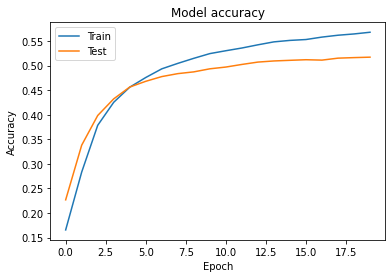

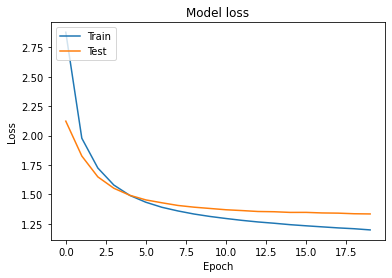

In [58]:
import matplotlib.pyplot as plt

# 绘制训练 & 验证的准确率值
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

繼續訓練

In [59]:
mycallback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]

history2 = Ten_class_M.fit(X_train,y_train, batch_size=2048, epochs=20,validation_data=(X_test, y_test), callbacks=mycallback)

Epoch 1/20
25/25 [==============================] - 43s 2s/step - loss: 1.1907 - accuracy: 0.5712 - val_loss: 1.3320 - val_accuracy: 0.5192
Epoch 2/20
25/25 [==============================] - 44s 2s/step - loss: 1.1845 - accuracy: 0.5737 - val_loss: 1.3317 - val_accuracy: 0.5205
Epoch 3/20
25/25 [==============================] - 43s 2s/step - loss: 1.1761 - accuracy: 0.5769 - val_loss: 1.3325 - val_accuracy: 0.5159
Epoch 4/20
25/25 [==============================] - 44s 2s/step - loss: 1.1701 - accuracy: 0.5788 - val_loss: 1.3312 - val_accuracy: 0.5164
Epoch 5/20
25/25 [==============================] - 44s 2s/step - loss: 1.1636 - accuracy: 0.5822 - val_loss: 1.3313 - val_accuracy: 0.5193
Epoch 6/20
25/25 [==============================] - 44s 2s/step - loss: 1.1562 - accuracy: 0.5850 - val_loss: 1.3302 - val_accuracy: 0.5179
Epoch 7/20
25/25 [==============================] - 44s 2s/step - loss: 1.1491 - accuracy: 0.5870 - val_loss: 1.3321 - val_accuracy: 0.5201
Epoch 8/20
25/25 [==

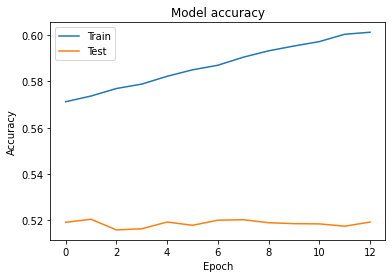

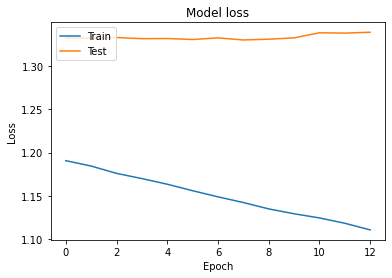

In [60]:
# 绘制训练 & 验证的准确率值
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
Ten_class_M.save('Ten_class_M.h5')